## Dynamic Time Warping(DTW) Algorithm in Time Series

In [9]:
pip install fastdtw

In [20]:
import pandas as pd
import numpy as np

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sbn

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
savefig_options = dict(format="png", dpi=150, bbox_inches="tight")


# Computation packages
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [21]:
def compute_euclidean_distance_matrix(x, y) -> np.array:
    """Calculate distance matrix
    This method calcualtes the pairwise Euclidean distance between two sequences.
    The sequences can have different lengths.
    """
    dist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            dist[i,j] = (x[j]-y[i])**2
    return dist

In [22]:
def compute_accumulated_cost_matrix(x, y) -> np.array:
    """Compute accumulated cost matrix for warp path using Euclidean distance
    """
    distances = compute_euclidean_distance_matrix(x, y)

    # Initialization
    cost = np.zeros((len(y), len(x)))
    cost[0,0] = distances[0,0]
    
    for i in range(1, len(y)):
        cost[i, 0] = distances[i, 0] + cost[i-1, 0]  
        
    for j in range(1, len(x)):
        cost[0, j] = distances[0, j] + cost[0, j-1]  

    # Accumulated warp path cost
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            cost[i, j] = min(
                cost[i-1, j],    # insertion
                cost[i, j-1],    # deletion
                cost[i-1, j-1]   # match
            ) + distances[i, j] 
            
    return cost

In [23]:
# Create two sequences
x = [7, 1, 2, 5, 9]
y = [1, 8, 0, 4, 4, 2, 0]


Text(0.5, 1.0, 'Euclidean Distance')

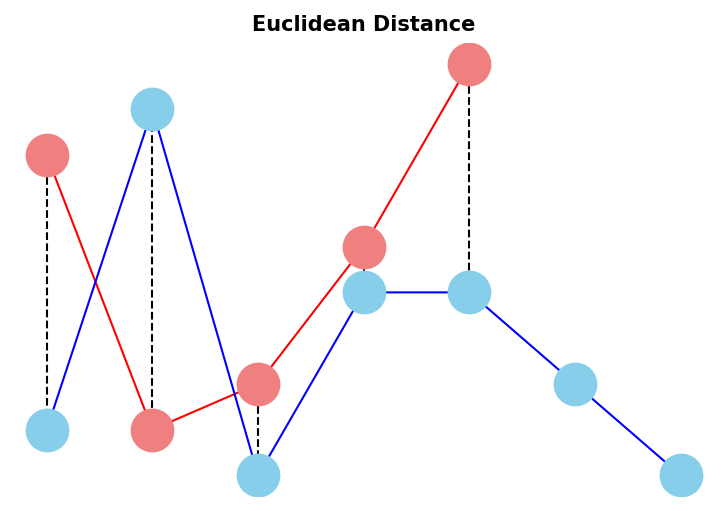

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

xx = [(i, x[i]) for i in np.arange(0, len(x))]
yy = [(j, y[j]) for j in np.arange(0, len(y))]

for i, j in zip(xx, yy[:-2]):
    ax.plot([i[0], j[0]], [i[1], j[1]], '--k', linewidth=1)

ax.plot(x, '-ro', label='x', linewidth=1, markersize=20, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y, '-bo', label='y', linewidth=1, markersize=20, markerfacecolor='skyblue', markeredgecolor='skyblue')
ax.set_title("Euclidean Distance", fontsize=10, fontweight="bold")


In [25]:
dtw_distance, warp_path = fastdtw(x, y, dist=euclidean) 

In [26]:
warp_path

[(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (4, 6)]

In [27]:
dtw_distance

23.0

In [28]:
cost_matrix = compute_accumulated_cost_matrix(x, y)


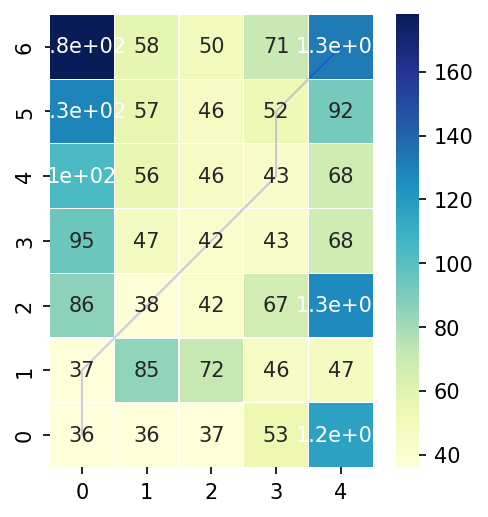

In [32]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sbn.heatmap(cost_matrix, annot=True, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
ax.invert_yaxis()

# Get the warp path in x and y directions
path_x = [p[0] for p in warp_path]
path_y = [p[1] for p in warp_path]

# Align the path from the center of each cell
path_xx = [x+0.5 for x in path_x]
path_yy = [y+0.5 for y in path_y]

ax.plot(path_xx, path_yy, color='blue', linewidth=1, alpha=0.2)


In [33]:
print("DTW distance: ", dtw_distance)
print("Warp path: ", warp_path)

DTW distance:  23.0
Warp path:  [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (4, 6)]


In [34]:
cost_matrix = compute_accumulated_cost_matrix(x, y)
print(np.flipud(cost_matrix)) # Flipping the cost matrix for easier comparison with heatmap values!


[[178.  58.  50.  71. 133.]
 [129.  57.  46.  52.  92.]
 [104.  56.  46.  43.  68.]
 [ 95.  47.  42.  43.  68.]
 [ 86.  38.  42.  67. 127.]
 [ 37.  85.  72.  46.  47.]
 [ 36.  36.  37.  53. 117.]]


Text(0.5, 1.0, 'DTW Distance')

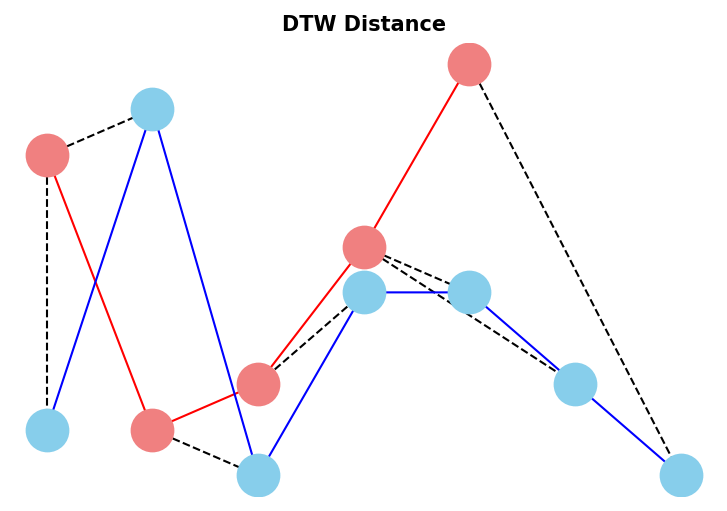

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

for [map_x, map_y] in warp_path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '--k', linewidth=1)

ax.plot(x, '-ro', label='x', linewidth=1, markersize=20, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y, '-bo', label='y', linewidth=1, markersize=20, markerfacecolor='skyblue', markeredgecolor='skyblue')

ax.set_title("DTW Distance", fontsize=10, fontweight="bold")
